In [1]:
import sys
sys.path.append('/Users/jp/Desktop/Investment/trading_BOT/macd_long_backtester_1stpkbm/')
from macd_long_backtester_1stpkbm import Macd_long_backtester_1stpkbm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

### 1) Launch optimization

In [3]:
macd_peak_opt_ee = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [4]:
# macd_peak_opt_ee.execute_opt(interval_opt=('15m', '30m', '1h'), start_opt='2018-08-11-00:00', end_opt='2018-10-15-00:00', ema_fast_opt=(2,16,2), ema_slow_opt=(16,40,2), ema_sign_opt=(2, 40, 2), int_for_max='1h', trend_ref='EE', type_trend='sideways_peak_ee')

### 2) Extract combinations of max

In [5]:
macd_peak_opt_ee.opt_results = pd.read_csv('sideways_peak_ee.csv')

In [6]:
macd_peak_opt_ee.opt_results[macd_peak_opt_ee.opt_results.multiple_macd_peak_strategy == macd_peak_opt_ee.opt_results.multiple_macd_peak_strategy.max()]

,interval_opt,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,ann_log_mean_hold,ann_log_std_hold,sharpe_ratio_hold,multiple_macd_peak_strategy,ann_log_mean_macd_peak,ann_log_std_macd_peak,sharpe_ratio_macd_peak,multiple_macd_peak_strategy_net,ann_log_mean_macd_peak_net,ann_log_std_macd_peak_net,sharpe_ratio_macd_peak_net,trend_ref,start_opt,end_opt
2662,30m,32,2,10,1.03916,0.00452,0.075988,0.059481,1.160205,0.01749,0.047161,0.370867,0.960629,-0.004728,0.047839,-0.098827,EE,2018-08-11-00:00,2018-10-15-00:00
2734,30m,32,10,2,1.03916,0.00452,0.075988,0.059481,1.160205,0.01749,0.047161,0.370867,0.960629,-0.004728,0.047839,-0.098827,EE,2018-08-11-00:00,2018-10-15-00:00


### 3) Create new class for interval of max and launch backtest for the combinations of max

In [37]:
macd_peak_opt_ee_30m = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [38]:
macd_peak_opt_ee_30m.prepare_data(start='2018-08-11-00:00', end='2018-10-15-00:00', interval='30m')

3121


In [39]:
macd_peak_opt_ee_30m.execute_backtest(start='2018-08-11-00:00', ema_slow=32, ema_fast=2, ema_signal=10)

3165
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0        1.03916            0.00452          0.075988           0.059481   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.160205                 0.01749               0.047161   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                0.370867                         0.960629   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                   -0.004728                   0.047839   

   sharpe_ratio_macd_peak_net  
0                   -0.098827  


(1.0391599333767227,
 0.0045198614076180825,
 0.07598825965138957,
 0.059481049156195925,
 1.160205246144934,
 0.017490447570633668,
 0.047160969389832934,
 0.3708670071231466,
 0.9606293340401411,
 -0.00472777437898599,
 0.04783879972379519,
 -0.09882719479340067)

### 4) Plot the accumulated max vs hold

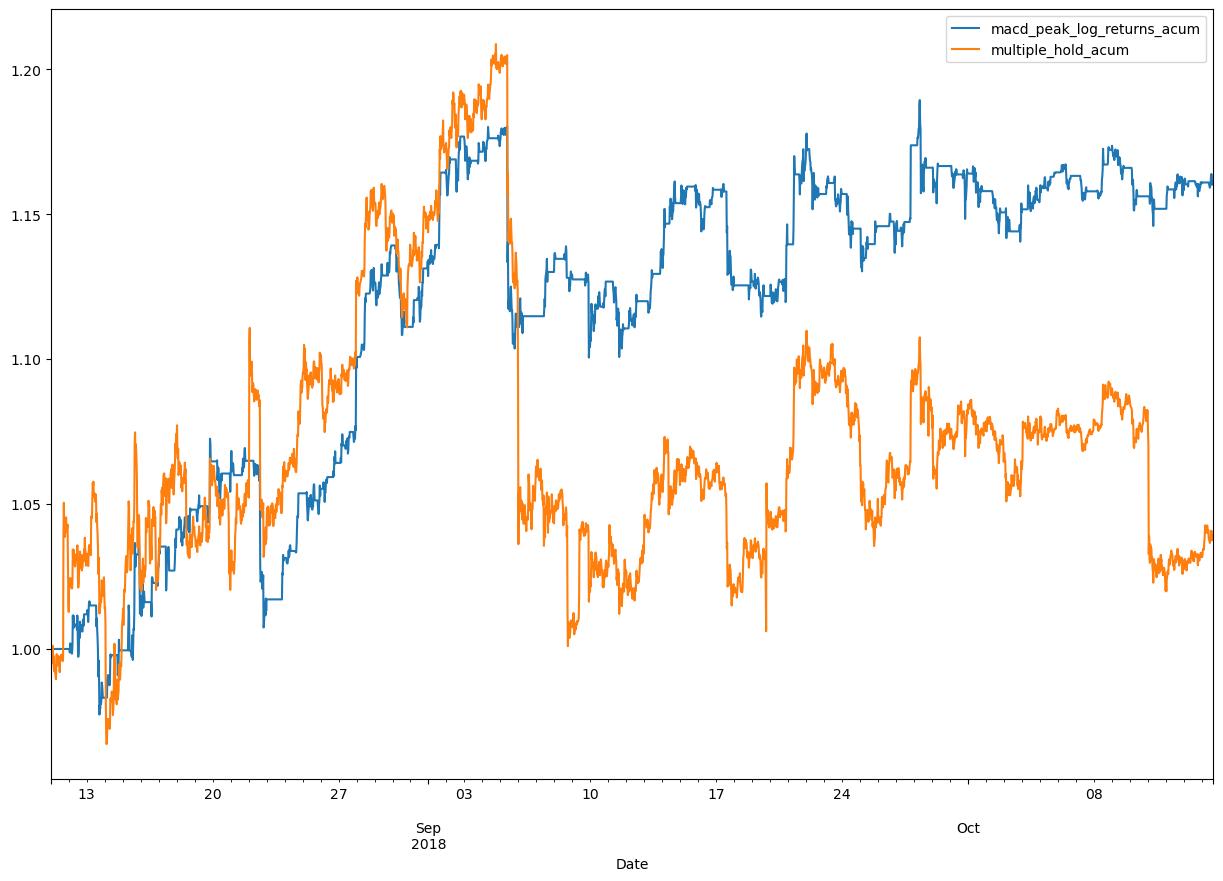

In [48]:
macd_peak_opt_ee_30m.data_init.macd_peak_log_returns_acum.plot(figsize=(15,10))
macd_peak_opt_ee_30m.data_init.multiple_hold_acum.plot(figsize=(15,10))
plt.legend()

__Results analysis from '2018-09-01-00:00' to '2018-09-10-00:00 with ema_slow=32, ema_fast=2, ema_signal=10'__</br>
The macd_peak strategy seems to be underperforming the buy and hold till the moment when a big drop in price occurs. The macd_peak is able to absorb the second drop in price that takes place after a first consolidation after the first drop. So, the conclusion of this plot is that, IT IS POSIBLE TO INCREASE RETURNS BY "PARTIALLY CUTTING" price drops. However it was necessary before the drop that an uptrend took place. so THE CONCLUSION IS: __THE POSITIVE RETURNS OF THE MACD_PEAK ARE DUE TO A DROP IN PRICE AFTER AN INITIAL UPTREND__
__ALL THE IMPROVEMENTS OF THE STRATEGY ARE COMMING FROM THE ABILITY OF THE SIGNAL TO CAPTURE A CERTAIN DROP IN PRICE SO.
### THIS RESULT WILL BE CONSIDERING AS INVALID FOR THE CALCULATION OF THE OPTIMAL PARAMETERS

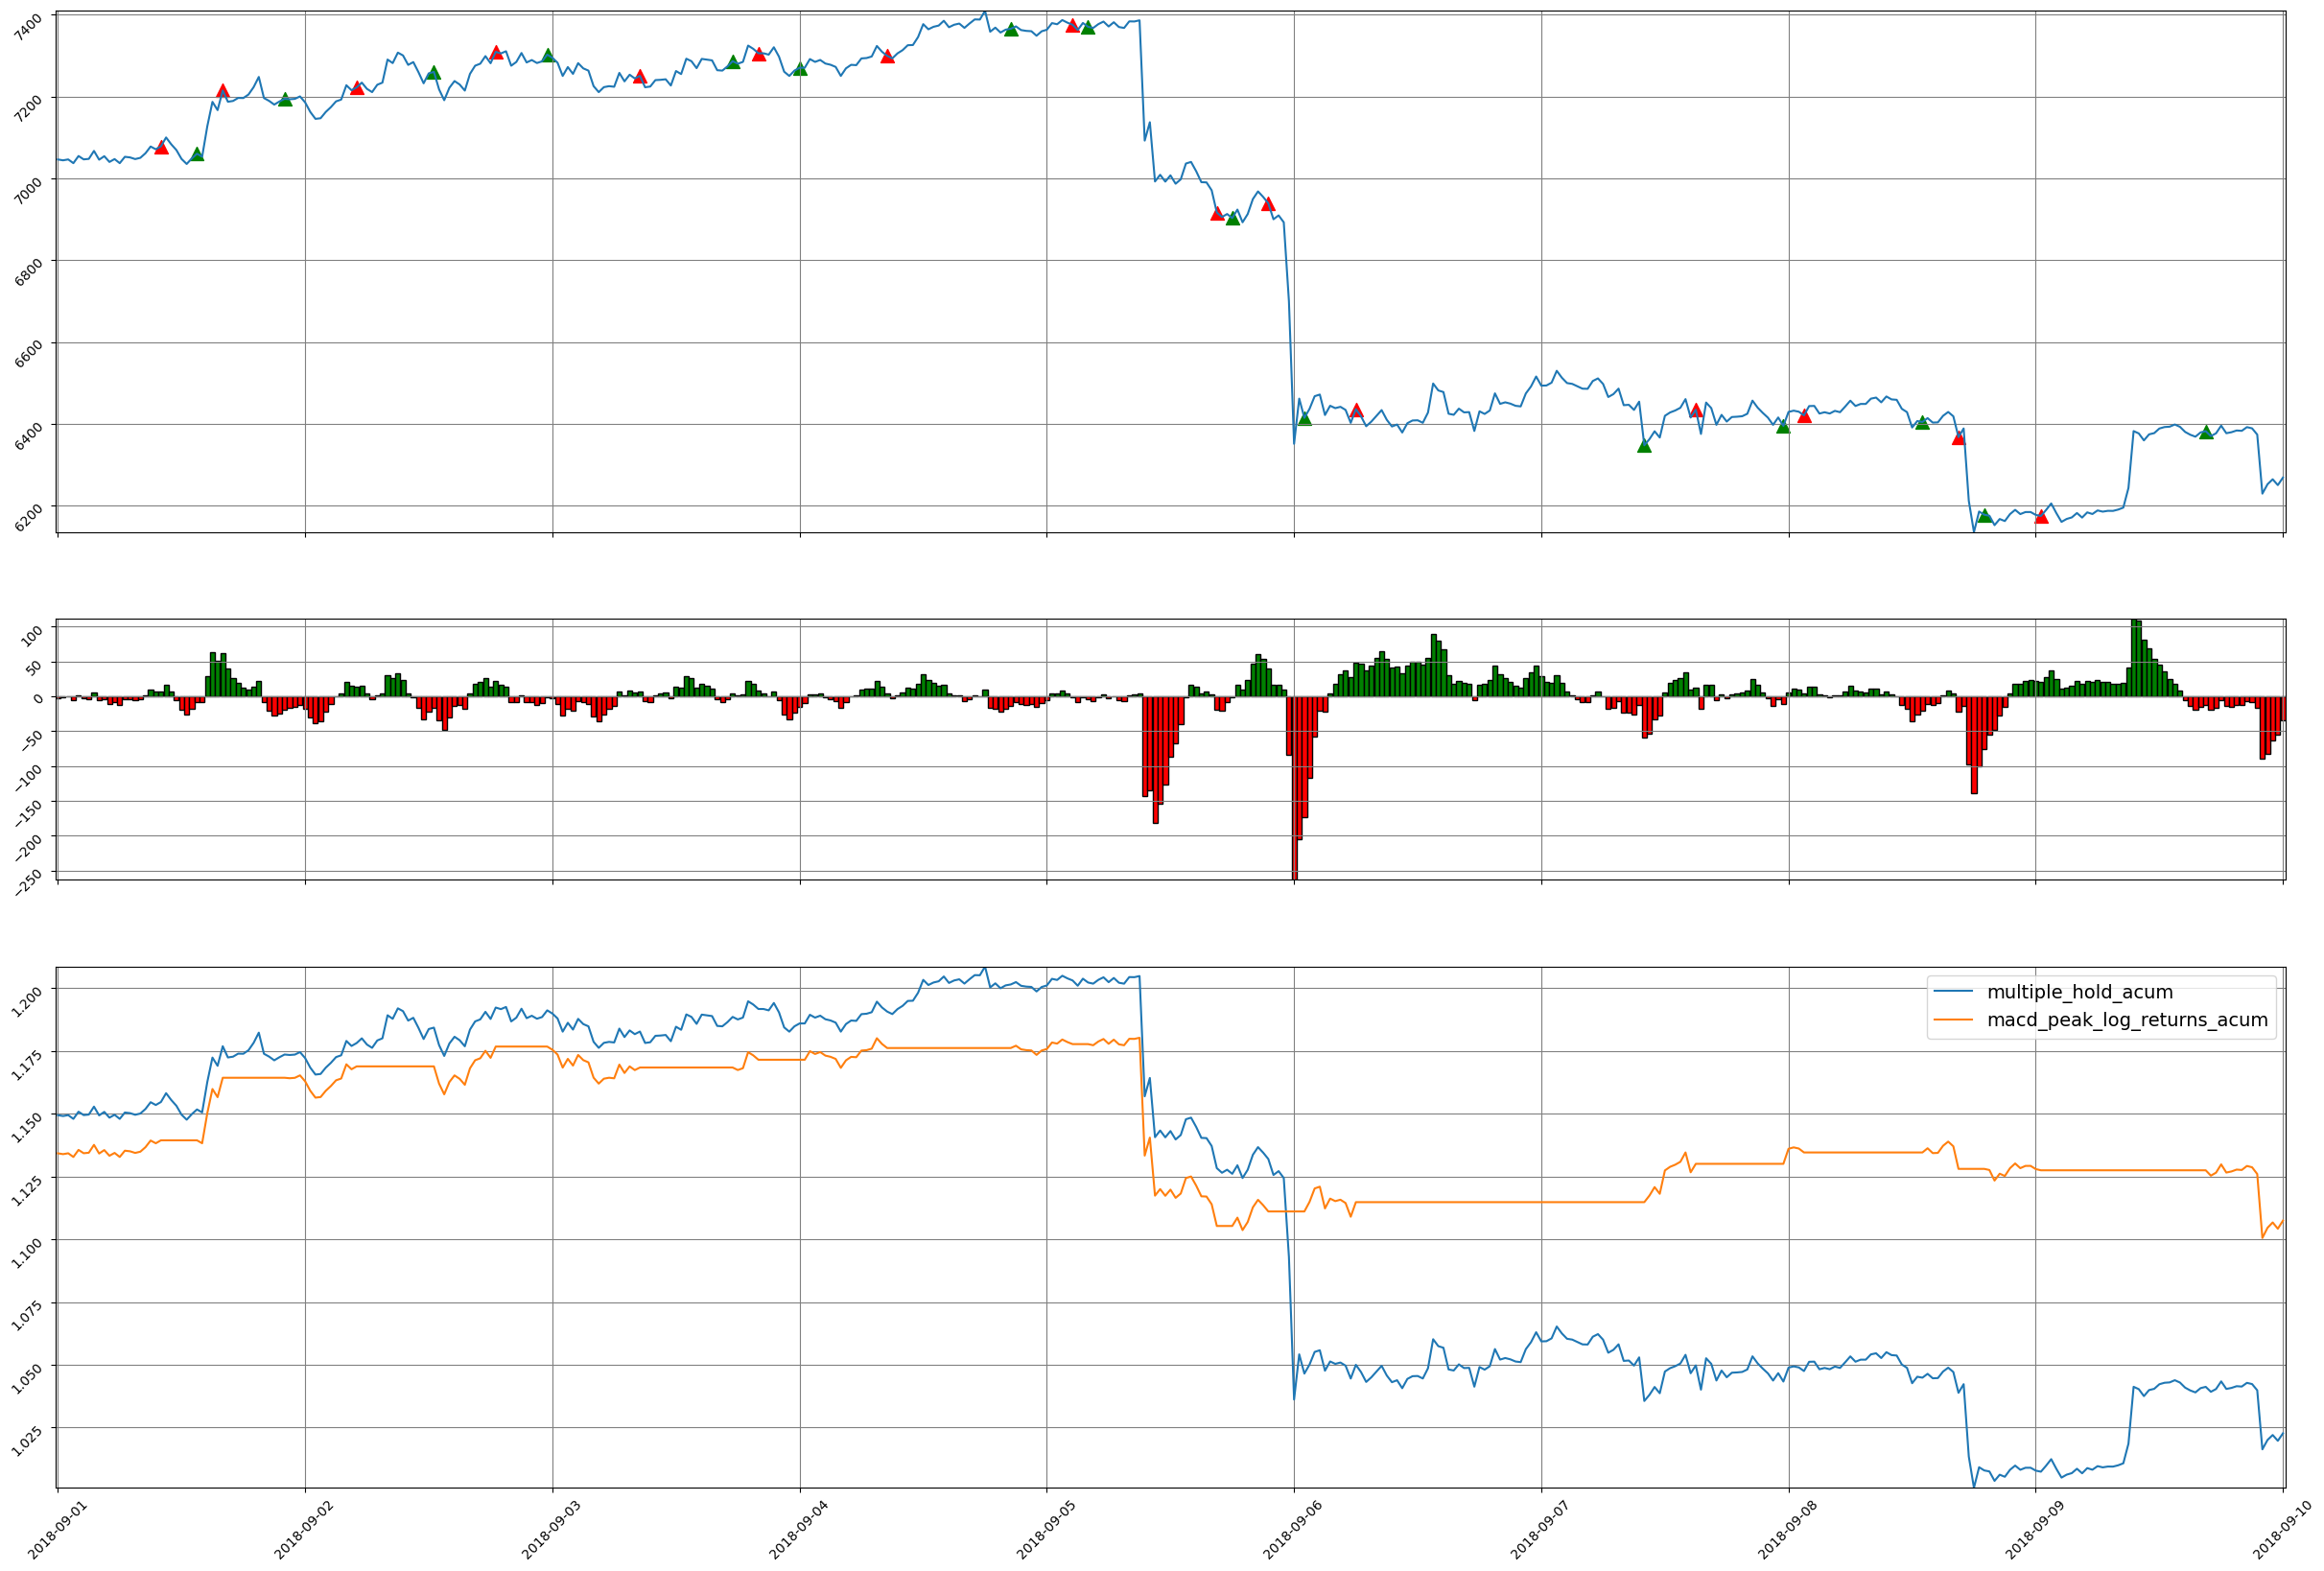

In [57]:
macd_peak_opt_ee_30m.plot_backtest_results(start_plot='2018-09-01-00:00', end_plot='2018-09-10-00:00', width_bars=0.02)

### 6) Carry out a backtest by using the optimization average parameters obtained for 30m: 26,5,11

In [50]:
macd_peak_opt_ee_30m_avg = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [51]:
macd_peak_opt_ee_30m_avg.prepare_data(start='2018-08-11-00:00', end='2018-10-15-00:00', interval='30m')

3121


In [52]:
macd_peak_opt_ee_30m_avg.execute_backtest(start='2018-08-11-00:00', ema_slow=26, ema_fast=5, ema_signal=11)

3160
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0        1.03916            0.00452          0.075988           0.059481   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.059237                0.006774               0.048649   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                0.139237                         0.889799   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                   -0.013743                   0.049339   

   sharpe_ratio_macd_peak_net  
0                   -0.278545  


(1.0391599333767227,
 0.0045198614076180825,
 0.07598825965138957,
 0.059481049156195925,
 1.0592373388877292,
 0.006773764110243314,
 0.048649301064435116,
 0.13923661721823272,
 0.8897991173168954,
 -0.013743062464855944,
 0.04933883477704512,
 -0.27854452840158883)

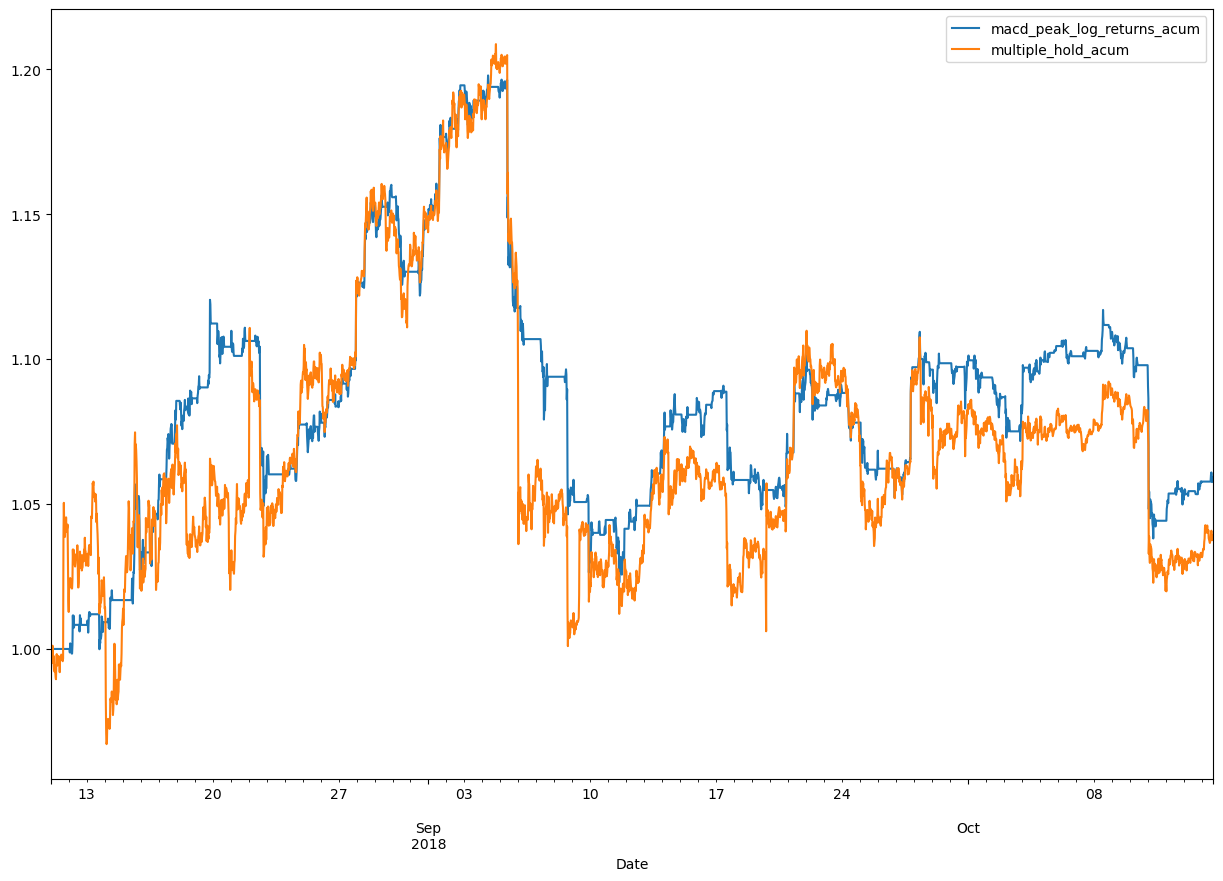

In [53]:
macd_peak_opt_ee_30m_avg.data_init.macd_peak_log_returns_acum.plot(figsize=(15,10))
macd_peak_opt_ee_30m_avg.data_init.multiple_hold_acum.plot(figsize=(15,10))
plt.legend()

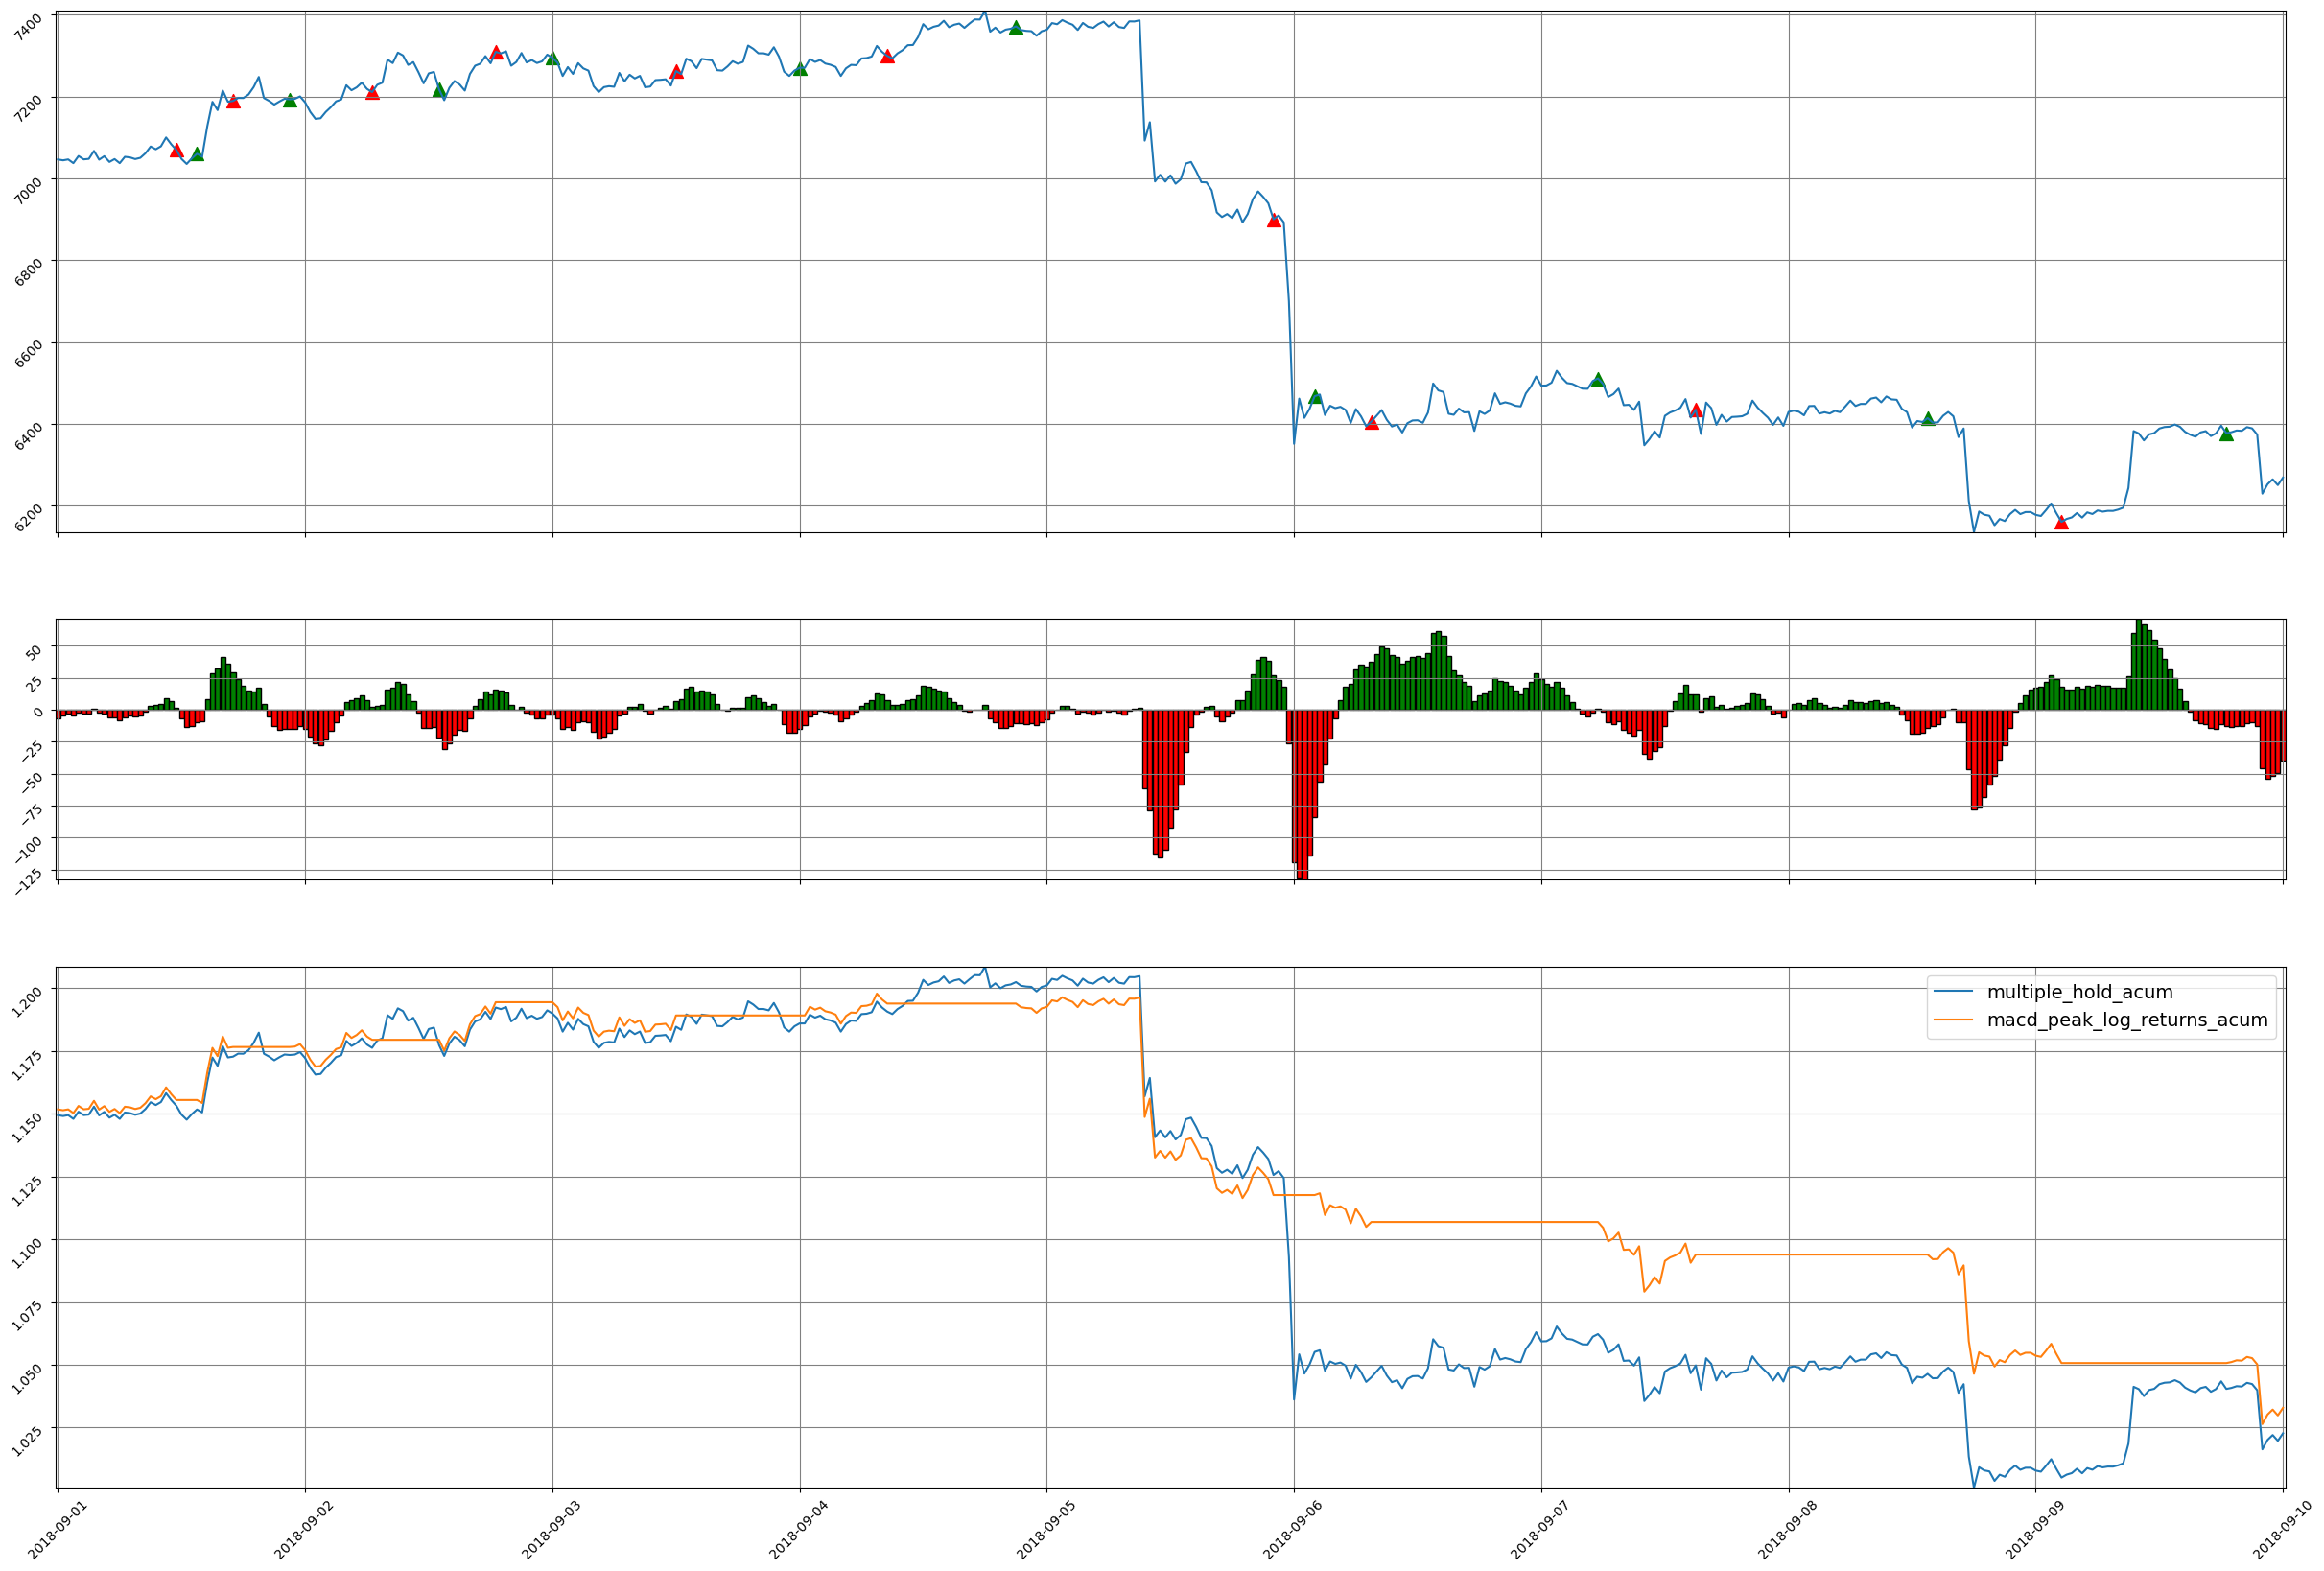

In [54]:
macd_peak_opt_ee_30m_avg.plot_backtest_results(start_plot='2018-09-01-00:00', end_plot='2018-09-10-00:00', width_bars=0.02)

__Results analysis from '2018-09-01-00:00' to '2018-09-10-00:00 with ema_slow=26, ema_fast=5, ema_signal=11'__</br>
It seems to be necessary a balance between a too low value for the fast signal and too high. But what is SURE is that it is necessary to create a function to detect rapid decline/increase in the macd_diff that it is out of the average among a certain number of past kandles

### 7) Apply an average value to the fast signal to see if the returns fall into the middle of the two backtest too (ema_fast = (5 + 2)/2 -> 3 and 4 to be tested

### 7.1) ema_fast = 3

In [60]:
macd_peak_opt_ee_30m_avg_emafast3 = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [61]:
macd_peak_opt_ee_30m_avg_emafast3.prepare_data(start='2018-08-11-00:00', end='2018-10-15-00:00', interval='30m')

3121


In [62]:
macd_peak_opt_ee_30m_avg_emafast3.execute_backtest(start='2018-08-11-00:00', ema_slow=26, ema_fast=3, ema_signal=11)

3160
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0        1.03916            0.00452          0.075988           0.059481   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.040042                0.004621               0.049854   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                0.092695                         0.863336   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                   -0.017297                   0.050509   

   sharpe_ratio_macd_peak_net  
0                   -0.342451  


(1.0391599333767227,
 0.0045198614076180825,
 0.07598825965138957,
 0.059481049156195925,
 1.0400417746704267,
 0.004621161337987726,
 0.04985360137727549,
 0.09269463409506391,
 0.8633355552267009,
 -0.017296814369069536,
 0.05050886999962088,
 -0.34245102630883184)

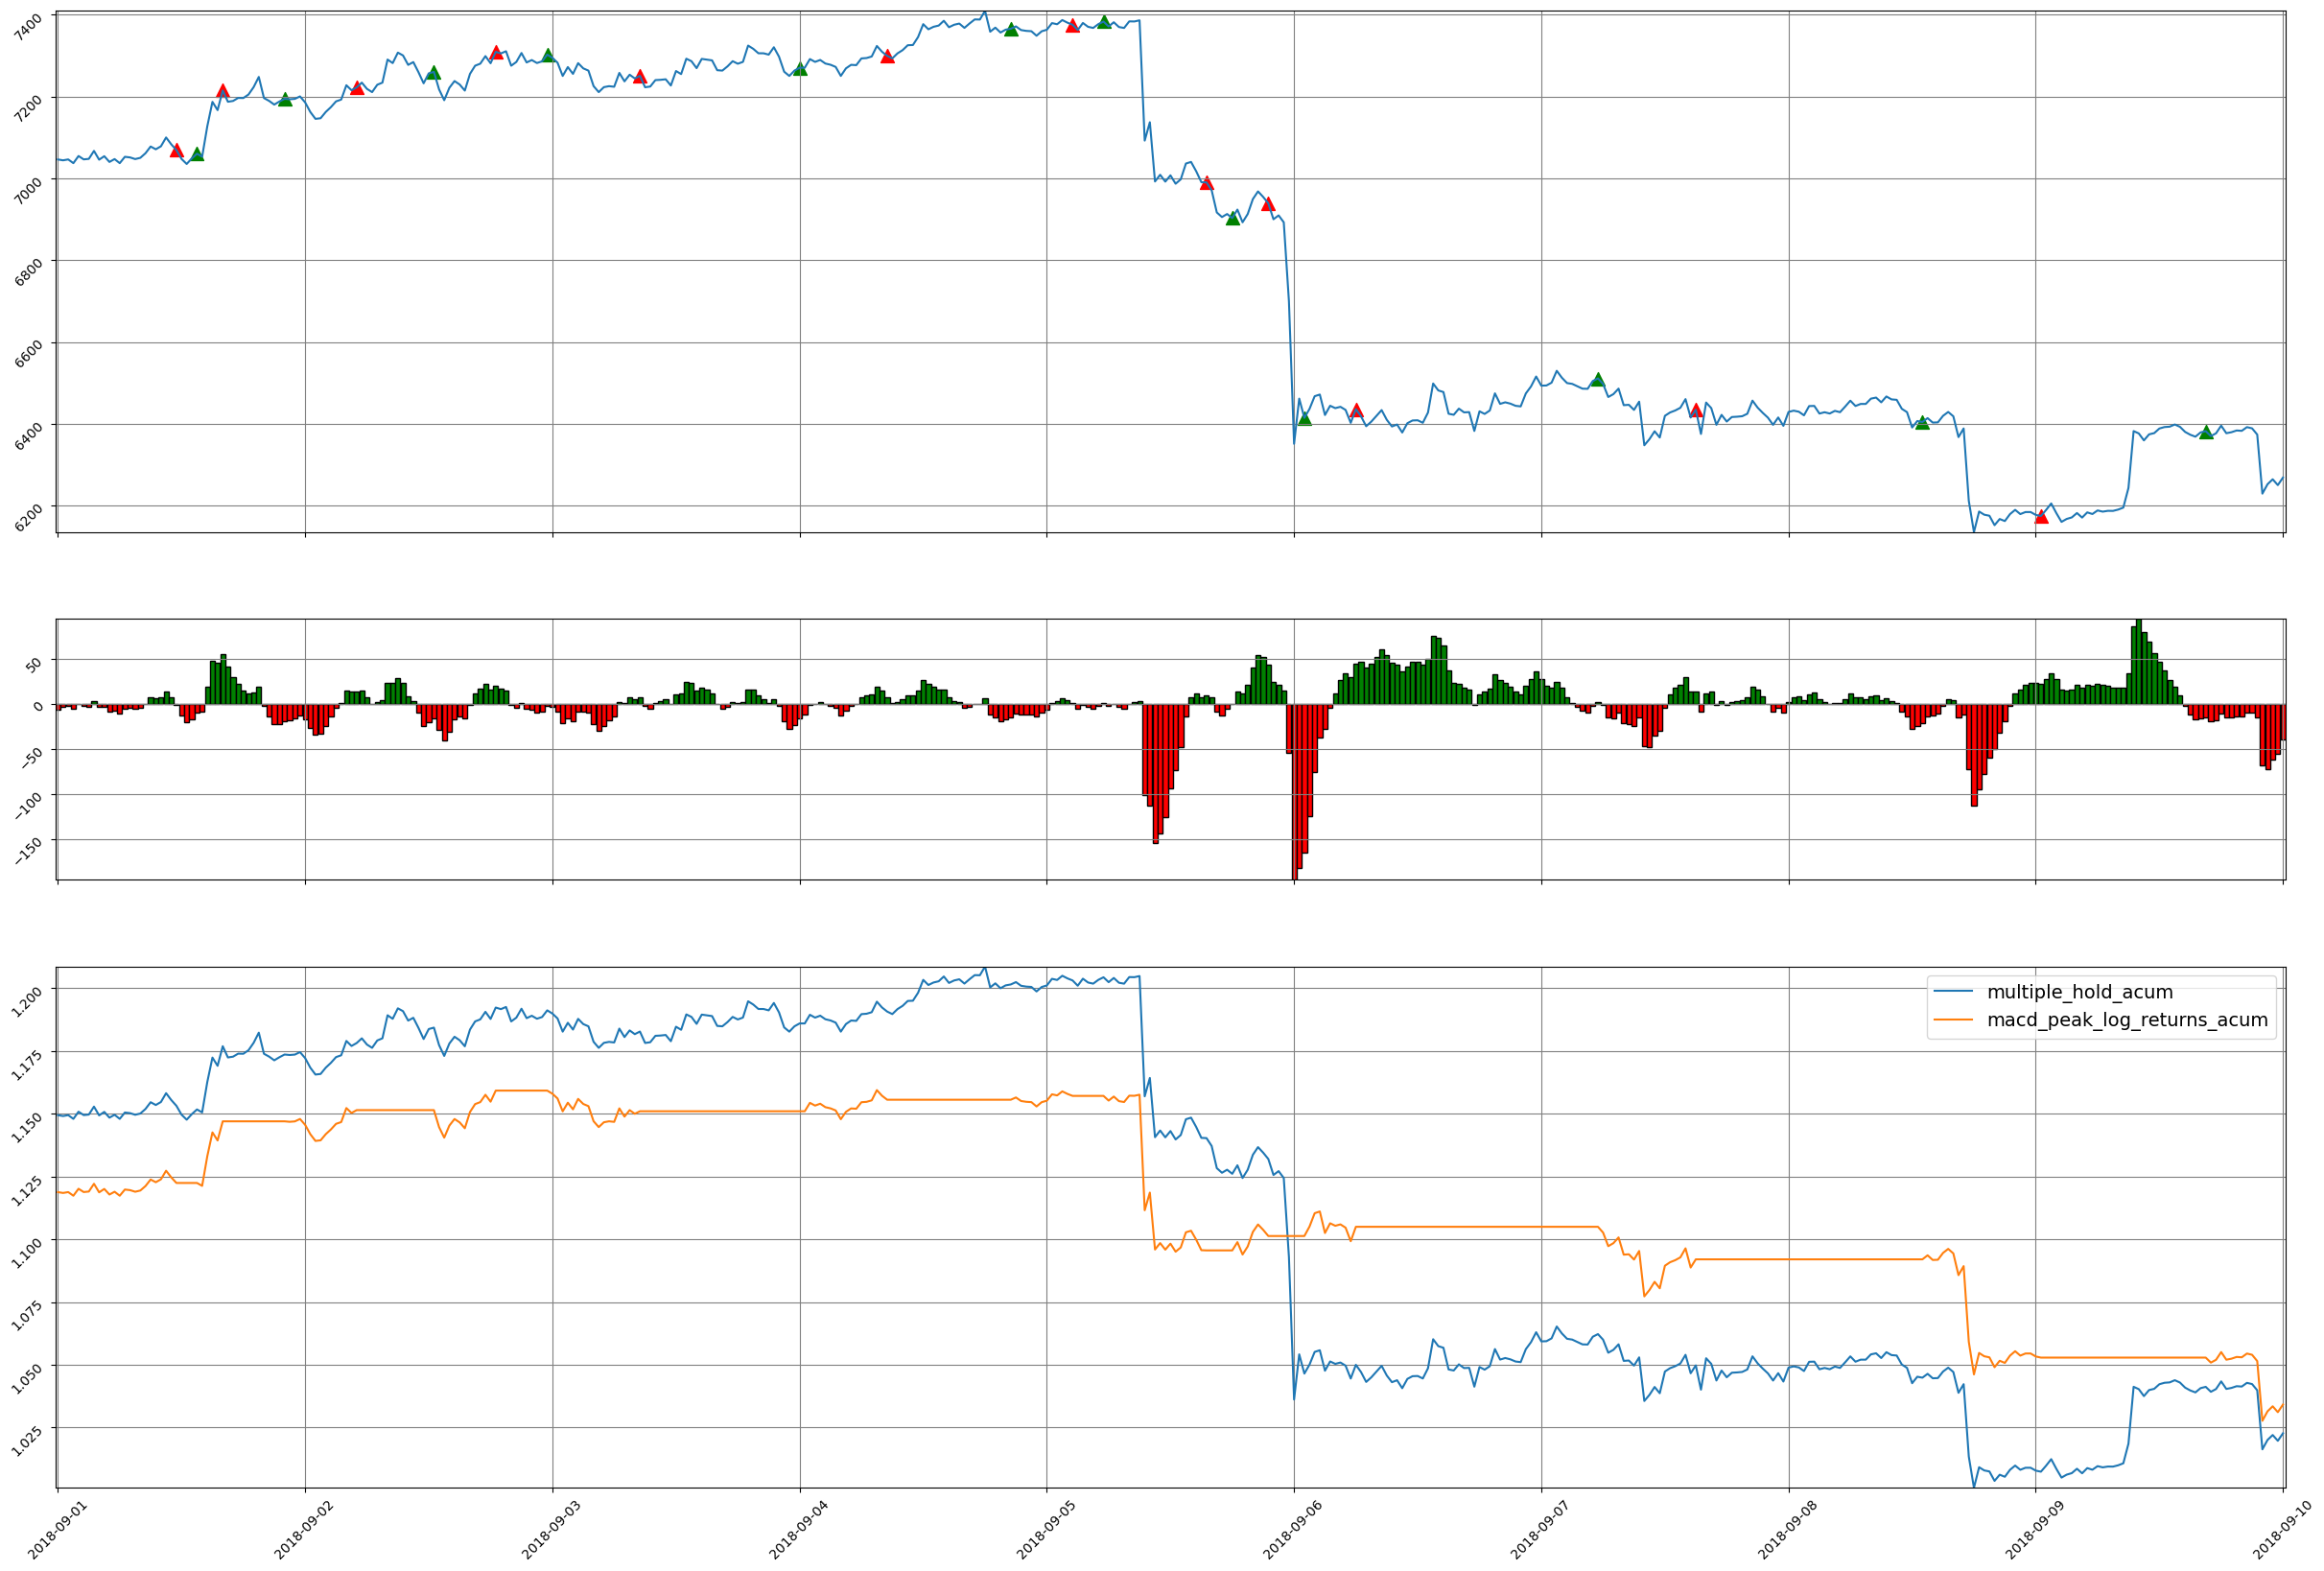

In [66]:
macd_peak_opt_ee_30m_avg_emafast3.plot_backtest_results(start_plot='2018-09-01-00:00', end_plot='2018-09-10-00:00', width_bars=0.02)

In [63]:
macd_peak_opt_ee_30m_avg_emafast4 = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [64]:
macd_peak_opt_ee_30m_avg_emafast4.prepare_data(start='2018-08-11-00:00', end='2018-10-15-00:00', interval='30m')

3121


In [65]:
macd_peak_opt_ee_30m_avg_emafast4.execute_backtest(start='2018-08-11-00:00', ema_slow=26, ema_fast=4, ema_signal=11)

3160
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0        1.03916            0.00452          0.075988           0.059481   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.041905                0.004832               0.049941   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                 0.09675                         0.869306   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                   -0.016486                   0.050585   

   sharpe_ratio_macd_peak_net  
0                   -0.325901  


(1.0391599333767227,
 0.0045198614076180825,
 0.07598825965138957,
 0.059481049156195925,
 1.0419049175294781,
 0.00483182894437779,
 0.049941463062656864,
 0.09674984768299134,
 0.8693058041634063,
 -0.016485654277554617,
 0.05058478826872309,
 -0.32590141901904146)

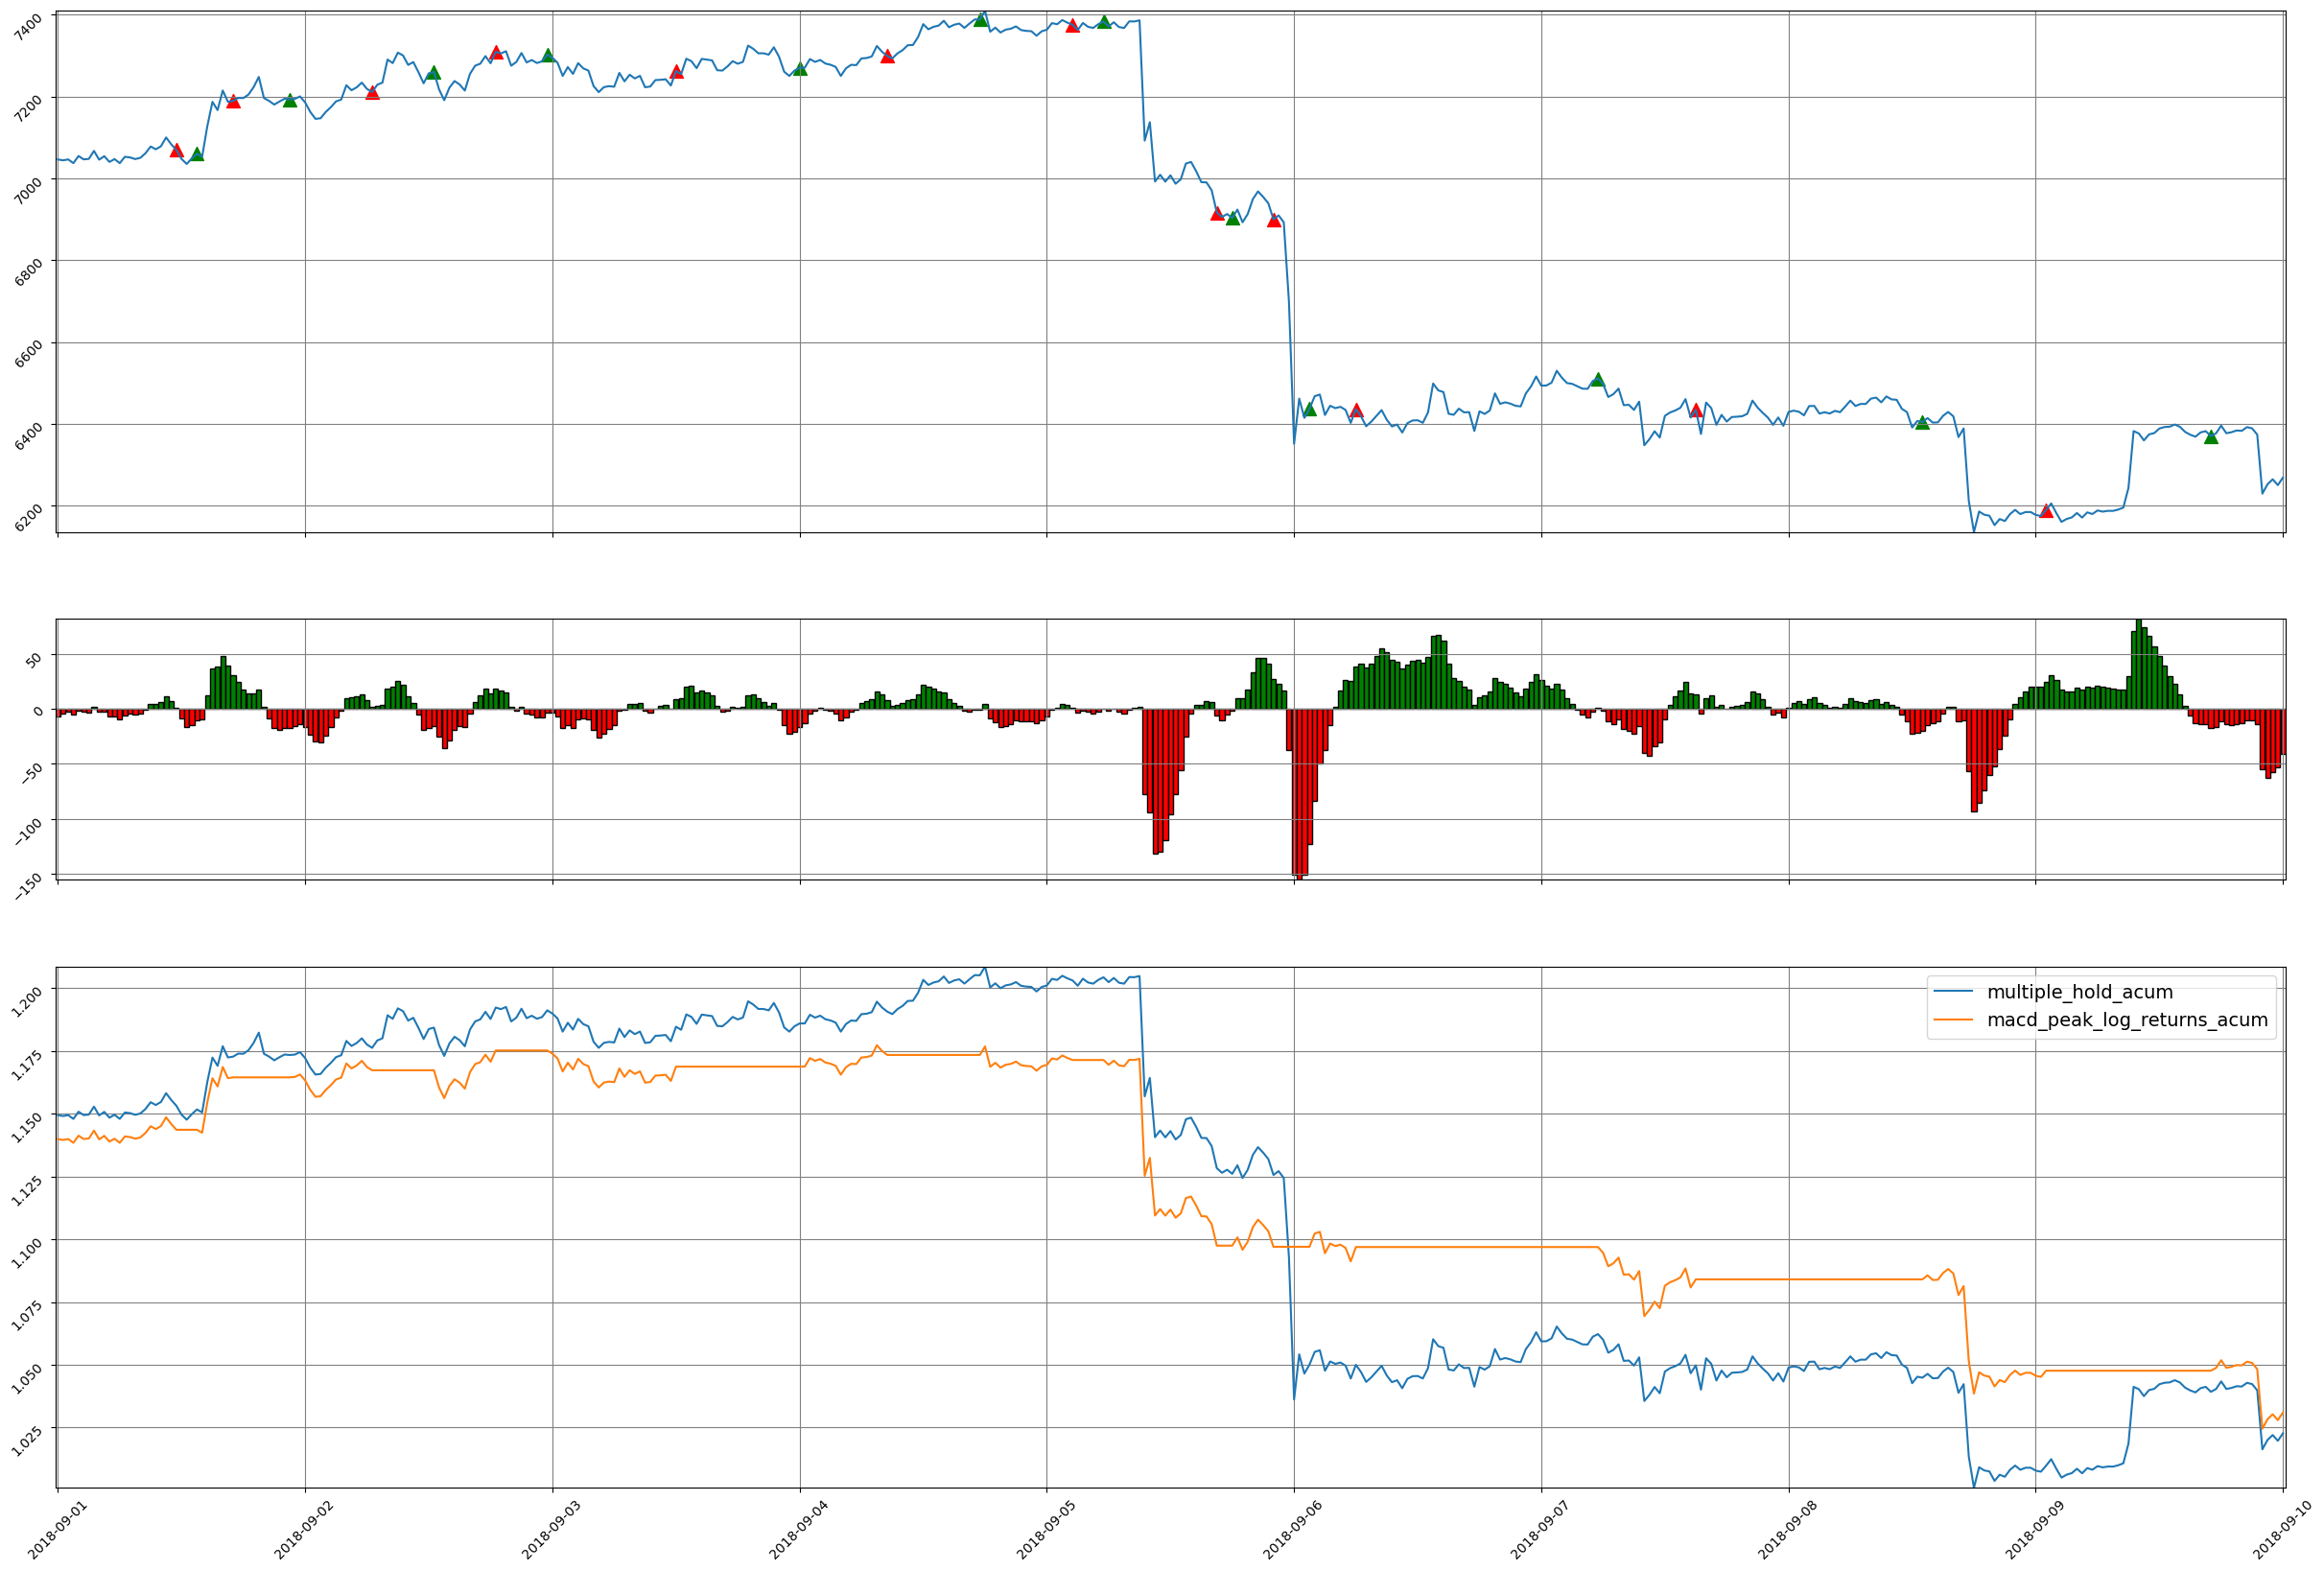

In [67]:
macd_peak_opt_ee_30m_avg_emafast4.plot_backtest_results(start_plot='2018-09-01-00:00', end_plot='2018-09-10-00:00', width_bars=0.02)

### Result: decreasing the value of ema_fast closer to the optimal its worsening the results, so there seems to be a minimum value of ema_fast.